In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
# %pip install hvplot bokeh
import hvplot.pandas 
import holoviews as hv
import plotly.express as px
import numpy as np
from scipy import stats

In [5]:
sensores = pd.read_csv("data/mod/data_sensores.csv")
cicese = pd.read_csv("data/mod/data_cicese_isla_cedros.csv") #datos de Isla Cedros solamente: 28°5.760'N 115°10.992'W

In [6]:
sensores["Local_time"] = pd.to_datetime(sensores["Local_time"])
sensores["anio"] = sensores["Local_time"].dt.year
sensores["mes"] = sensores["Local_time"].dt.month
sensores["dia"] = sensores["Local_time"].dt.day
sensores["hora"] = sensores["Local_time"].dt.hour
sensores["minuto"] = sensores["Local_time"].dt.minute
sensores["coordenadas"] = sensores.apply(lambda x: str(x['Latitude'])+", "+str(x['Longitude']), axis=1)
sensores

,UTC_date_time,Local_time,Battery,Temperature,Dissolved.Oxygen,Dissolved.Oxygen.Saturation,Q,timeZone,Type_Instrument,Community,...,Longitude,Label,ID,facet_var,anio,mes,dia,hora,minuto,coordenadas
0,2017-09-24T07:02:00Z,2017-09-24 00:02:00,3.49,15.178,7.042003,86.339844,0.996,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,2,"29.79099, -115.80957"
1,2017-09-24T07:12:00Z,2017-09-24 00:12:00,3.49,15.170,7.047593,86.394652,0.997,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,12,"29.79099, -115.80957"
2,2017-09-24T07:22:00Z,2017-09-24 00:22:00,3.49,15.161,6.988217,85.651466,0.995,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,22,"29.79099, -115.80957"
3,2017-09-24T07:32:00Z,2017-09-24 00:32:00,3.49,15.144,7.002633,85.799181,0.996,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,32,"29.79099, -115.80957"
4,2017-09-24T07:42:00Z,2017-09-24 00:42:00,3.49,15.161,6.970355,85.432536,0.996,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,42,"29.79099, -115.80957"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852360,2017-09-28T00:06:00Z,2017-09-27 18:06:00,3.47,29.265,-2.001433,-31.545622,0.000,Hora.estándar.de.las.Rocosas,MiniDOT,LaBocana,...,NaN,NA) NA,NaN,Granja,2017,9,27,18,6,"nan, nan"
852361,2017-09-28T00:16:00Z,2017-09-27 18:16:00,3.48,27.143,-0.647966,-9.864496,0.004,Hora.estándar.de.las.Rocosas,MiniDOT,LaBocana,...,NaN,NA) NA,NaN,Granja,2017,9,27,18,16,"nan, nan"
852362,2017-09-28T00:26:00Z,2017-09-27 18:26:00,3.48,27.839,-1.083684,-16.688337,0.003,Hora.estándar.de.las.Rocosas,MiniDOT,LaBocana,...,NaN,NA) NA,NaN,Granja,2017,9,27,18,26,"nan, nan"
852363,2017-09-28T00:36:00Z,2017-09-27 18:36:00,3.48,28.145,-1.080803,-16.727699,0.003,Hora.estándar.de.las.Rocosas,MiniDOT,LaBocana,...,NaN,NA) NA,NaN,Granja,2017,9,27,18,36,"nan, nan"


In [7]:
# Map

df = sensores
df = df.groupby(["coordenadas", "Community"]).mean()
df = df.reset_index()
df = df[["Longitude", "Latitude", "Community"]]
df.to_csv("data/geo/sensors_stations.csv")


In [8]:
cicese_minutos = cicese.groupby(["anio", "mes", "dia", "hora", "minuto"]).mean()
sensores_minutos = sensores.groupby(["anio", "mes", "dia", "hora", "minuto"]).mean()

In [9]:
cicese_minutos.head()

Unnamed: 0  segundo  id_estacion  voltaje_sistema  \
anio mes dia hora minuto                                                      
2014 11  28  0    5              0.0      0.0        113.0            12.39   
                  6              1.0      0.0        113.0            12.39   
                  7              2.0      0.0        113.0            12.39   
                  8              3.0      0.0        113.0            12.39   
                  9              4.0      0.0        113.0            12.39   

                          nivel_mar_leveltrol  nivel_mar_burbujeador  sw_1  \
anio mes dia hora minuto                                                     
2014 11  28  0    5                       0.0                  2.093   0.0   
                  6                       0.0                  2.099   0.0   
                  7                       0.0                  2.070   0.0   
                  8                       0.0                  2.072   0.0   
                  9                       0.0                  2.078   0.0   

                          sw_2  temperatura_agua  nivel_mar_ott_rsl  \
anio mes dia hora minuto                                              
2014 11  28  0    5        0.0             21.42                0.0   
                  6        0.0             21.42                0.0   
                  7        0.0             21.42                0.0   
                  8        0.0             21.42                0.0   
                  9        0.0             21.42                0.0   

                          radiacion_solar  direccion_viento  magnitud_viento  \
anio mes dia hora minuto                                                       
2014 11  28  0    5                 130.0             239.0              1.4   
                  6                 126.8             247.0              1.3   
                  7                 123.4             238.0              1.5   
                  8                 120.1             245.0              1.7   
                  9                 116.4             244.0              1.5   

                          temperatura_aire  humedad_relativa  \
anio mes dia hora minuto                                       
2014 11  28  0    5                   24.8              39.5   
                  6                   24.8              40.2   
                  7                   24.8              42.5   
                  8                   24.8              43.4   
                  9                   24.8              44.4   

                          presion_atmosferica  precipitacion  \
anio mes dia hora minuto                                       
2014 11  28  0    5                   1013.80            0.0   
                  6                   1013.84            0.0   
                  7                   1013.87            0.0   
                  8                   1013.90            0.0   
                  9                   1013.90            0.0   

                          voltaje_estacion_met  nivel_mar_sutron  
anio mes dia hora minuto                                          
2014 11  28  0    5                       12.7             6.052  
                  6                       12.7             6.042  
                  7                       12.7             6.035  
                  8                       12.7             6.035  
                  9                       12.7             6.036

In [10]:
set(sensores.coordenadas.dropna())

{'26.69912, -113.64585',
 '26.74856, -113.50941',
 '26.77482, -113.69234',
 '26.77558, -113.71331',
 '26.79299, -113.70034',
 '26.79495, -113.72841',
 '26.98727, -113.97182',
 '27.10345, -114.2965',
 '27.17093, -114.42178',
 '27.43289, -114.5522',
 '27.5271, -114.74084',
 '27.62015, -114.84217',
 '27.71595, -115.00466',
 '27.8105, -114.50412',
 '27.83632, -115.07539',
 '27.87984, -115.21378',
 '27.8804, -115.2134',
 '27.88691, -115.18875',
 '28.30091, -115.57863',
 '28.3532, -115.19258',
 '29.79099, -115.80957',
 'nan, nan'}

In [11]:
merged = pd.merge(sensores_minutos, cicese_minutos, left_index=True, right_index=True)

In [12]:
sensores

,UTC_date_time,Local_time,Battery,Temperature,Dissolved.Oxygen,Dissolved.Oxygen.Saturation,Q,timeZone,Type_Instrument,Community,...,Longitude,Label,ID,facet_var,anio,mes,dia,hora,minuto,coordenadas
0,2017-09-24T07:02:00Z,2017-09-24 00:02:00,3.49,15.178,7.042003,86.339844,0.996,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,2,"29.79099, -115.80957"
1,2017-09-24T07:12:00Z,2017-09-24 00:12:00,3.49,15.170,7.047593,86.394652,0.997,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,12,"29.79099, -115.80957"
2,2017-09-24T07:22:00Z,2017-09-24 00:22:00,3.49,15.161,6.988217,85.651466,0.995,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,22,"29.79099, -115.80957"
3,2017-09-24T07:32:00Z,2017-09-24 00:32:00,3.49,15.144,7.002633,85.799181,0.996,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,32,"29.79099, -115.80957"
4,2017-09-24T07:42:00Z,2017-09-24 00:42:00,3.49,15.161,6.970355,85.432536,0.996,Pacific.Standard.Time,MiniDOT,ElRosario,...,-115.80957,2) ElRosario - Sportfish,2.0,Sportfish,2017,9,24,0,42,"29.79099, -115.80957"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852360,2017-09-28T00:06:00Z,2017-09-27 18:06:00,3.47,29.265,-2.001433,-31.545622,0.000,Hora.estándar.de.las.Rocosas,MiniDOT,LaBocana,...,NaN,NA) NA,NaN,Granja,2017,9,27,18,6,"nan, nan"
852361,2017-09-28T00:16:00Z,2017-09-27 18:16:00,3.48,27.143,-0.647966,-9.864496,0.004,Hora.estándar.de.las.Rocosas,MiniDOT,LaBocana,...,NaN,NA) NA,NaN,Granja,2017,9,27,18,16,"nan, nan"
852362,2017-09-28T00:26:00Z,2017-09-27 18:26:00,3.48,27.839,-1.083684,-16.688337,0.003,Hora.estándar.de.las.Rocosas,MiniDOT,LaBocana,...,NaN,NA) NA,NaN,Granja,2017,9,27,18,26,"nan, nan"
852363,2017-09-28T00:36:00Z,2017-09-27 18:36:00,3.48,28.145,-1.080803,-16.727699,0.003,Hora.estándar.de.las.Rocosas,MiniDOT,LaBocana,...,NaN,NA) NA,NaN,Granja,2017,9,27,18,36,"nan, nan"


In [13]:
merged = merged[['Battery', 'Temperature', 'Dissolved.Oxygen', 'Dissolved.Oxygen.Saturation', 'Q', 
                 'Latitude', 'Longitude', 'temperatura_agua', 'nivel_mar_ott_rsl',
                 'nivel_mar_sutron', 'nivel_mar_burbujeador', 'nivel_mar_leveltrol', 'radiacion_solar',
                 'direccion_viento', 'magnitud_viento', 'temperatura_aire', 'humedad_relativa', 
                 'presion_atmosferica', 'precipitacion']]

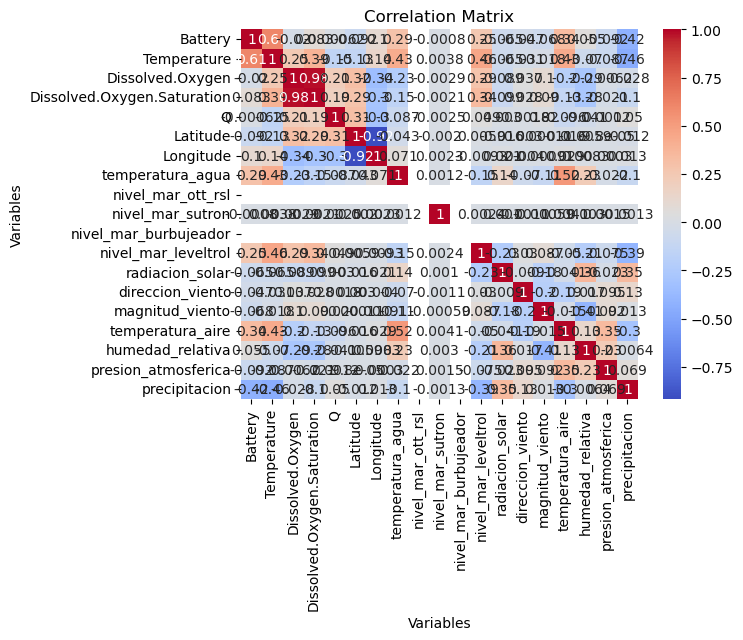

In [14]:
corr = merged.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xlabel('Variables') 
plt.ylabel('Variables') 




plt.title('Correlation Matrix')
plt.show()

In [15]:
hm = corr.hvplot.heatmap(cmap='coolwarm', width=1000, height=900).sort()
hv.save(hm, 'heatmap.html')

Pearson correlation coefficient:  0.43463563326097193
p-value:  0.0
New Pearson correlation coefficient:  0.43463563326097193
New p-value:  0.0


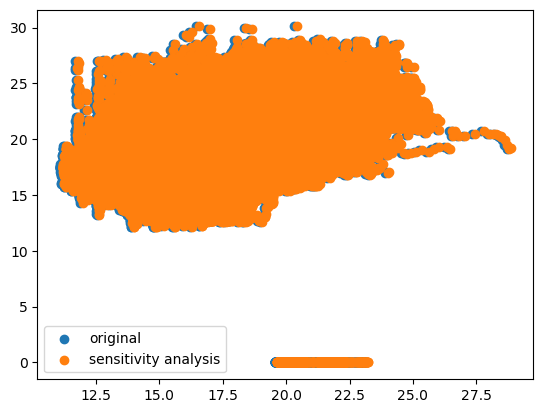

In [28]:
# Sensitivity analysis
df = merged
x = df['Temperature']
y = df['temperatura_aire']

r, p = stats.pearsonr(x, y)
print('Pearson correlation coefficient: ', r)
print('p-value: ', p)

new_x = x + 0.1
new_r, new_p = stats.pearsonr(new_x, y)
print('New Pearson correlation coefficient: ', new_r)
print('New p-value: ', new_p)

plt.scatter(x, y, label='original')
plt.scatter(new_x, y, label='sensitivity analysis')
plt.legend()
plt.show()